# Predict Wind Turbine Energy Output

### Data Importation

In [1]:
import numpy as np
import matplotlib.pyplot as mango
%matplotlib inline
import pandas as pd 
import seaborn as sb

data = pd.read_csv('/Users/macbookpro/Desktop/Wind Turbine Dataset.csv')

### Data Exploration

In [4]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 0:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 0:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 0:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 0:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 0:40,380.650696,5.577941,491.702972,265.674286


In [5]:
data.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [2]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [3]:
data.dtypes

Date/Time                        datetime64[ns]
LV ActivePower (kW)                     float64
Wind Speed (m/s)                        float64
Theoretical_Power_Curve (KWh)           float64
Wind Direction (°)                      float64
dtype: object

In [8]:
data.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [10]:
data.shape

(50530, 5)

In [13]:
data.describe

<bound method NDFrame.describe of                 Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0     2018-01-01 00:00:00           380.047791          5.311336   
1     2018-01-01 00:10:00           453.769196          5.672167   
2     2018-01-01 00:20:00           306.376587          5.216037   
3     2018-01-01 00:30:00           419.645904          5.659674   
4     2018-01-01 00:40:00           380.650696          5.577941   
...                   ...                  ...               ...   
50525 2018-12-31 23:10:00          2963.980957         11.404030   
50526 2018-12-31 23:20:00          1684.353027          7.332648   
50527 2018-12-31 23:30:00          2201.106934          8.435358   
50528 2018-12-31 23:40:00          2515.694092          9.421366   
50529 2018-12-31 23:50:00          2820.466064          9.979332   

       Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                         416.328908          259.994904  
1                         519.9

### Data Cleaning

In [15]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [16]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50525    False
50526    False
50527    False
50528    False
50529    False
Length: 50530, dtype: bool

In [17]:
data.duplicated('LV ActivePower (kW)')

0        False
1        False
2        False
3        False
4        False
         ...  
50525    False
50526    False
50527    False
50528    False
50529    False
Length: 50530, dtype: bool

In [3]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [30]:
data.dtypes

Date/Time                        datetime64[ns]
LV ActivePower (kW)                     float64
Wind Speed (m/s)                        float64
Theoretical_Power_Curve (KWh)           float64
Wind Direction (°)                      float64
dtype: object

#### MISSING DATA POINTS
     ** 2018-01-26 06:20:00  -  2018-01-30 14:40:00 **
     ** 2018-09-28 21:20:00  -  2018-10-02 16:30:00 **
     ** 2018-11-10 21:10:00  -  2018-11-14 12:00:00 ** 
        

### Data Visualization

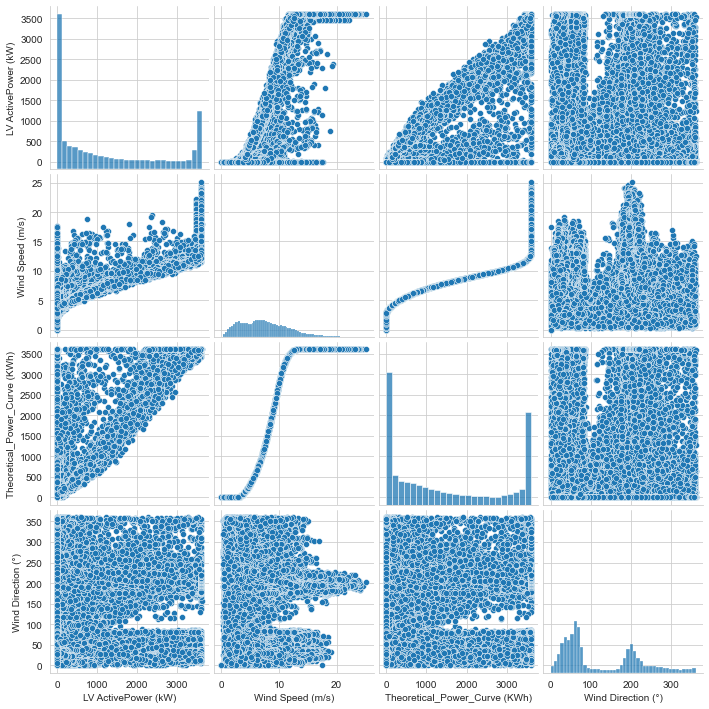

In [61]:
sb.pairplot(data=data)

#### LV Active Power vs Wind Direction

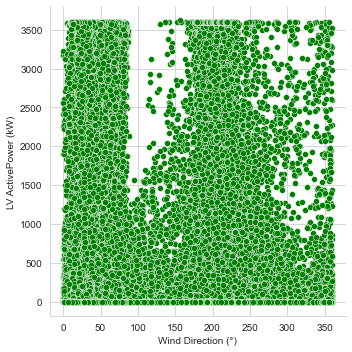

In [11]:
sb.set_style('whitegrid')
sb.relplot(x = 'Wind Direction (°)', y = 'LV ActivePower (kW)', data=data, color='g')

#### LV Active Power vs Wind Speed

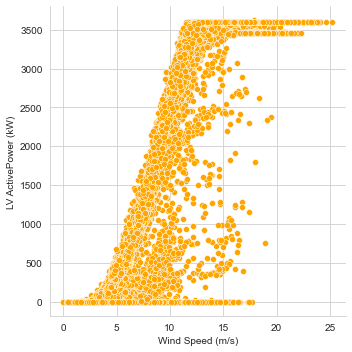

In [34]:
sb.set_style('whitegrid')
sb.relplot(x = 'Wind Speed (m/s)', y = 'LV ActivePower (kW)', data=data, color='orange')

#### LV Active Power vs Theoretical Power 

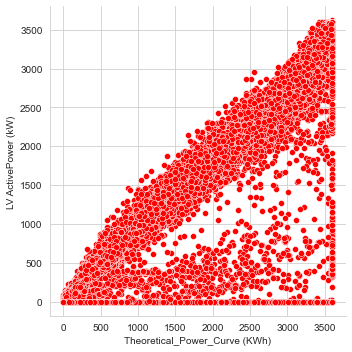

In [13]:
sb.set_style('whitegrid')
sb.relplot(x = 'Theoretical_Power_Curve (KWh)', y = 'LV ActivePower (kW)', data=data, color='red')

#### Date/Time vs Wind Speed

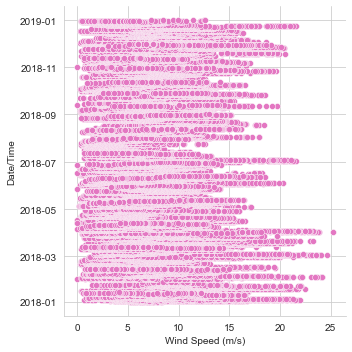

In [65]:
sb.set_style('whitegrid')
sb.relplot(x = 'Wind Speed (m/s)', y = 'Date/Time', data=data, color=bened)

In [58]:
bened = sb.color_palette()[6]

#### Date/Time vs Wind Direction

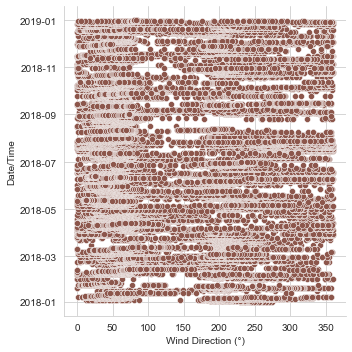

In [9]:
sb.set_style('whitegrid')
greg=sb.color_palette()[5]
sb.relplot(x='Wind Direction (°)', y='Date/Time', data=data, color=greg)

### Modelling

In [53]:
X = data[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
Y = data['LV ActivePower (kW)']

In [54]:
print(X)

       Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  Wind Direction (°)
0              5.311336                     416.328908          259.994904
1              5.672167                     519.917511          268.641113
2              5.216037                     390.900016          272.564789
3              5.659674                     516.127569          271.258087
4              5.577941                     491.702972          265.674286
...                 ...                            ...                 ...
50525         11.404030                    3397.190793           80.502724
50526          7.332648                    1173.055771           84.062599
50527          8.435358                    1788.284755           84.742500
50528          9.421366                    2418.382503           84.297913
50529          9.979332                    2779.184096           82.274620

[50530 rows x 3 columns]


In [55]:
print(Y)

0         380.047791
1         453.769196
2         306.376587
3         419.645904
4         380.650696
            ...     
50525    2963.980957
50526    1684.353027
50527    2201.106934
50528    2515.694092
50529    2820.466064
Name: LV ActivePower (kW), Length: 50530, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.23)

In [60]:
len(X_train)

38908

In [32]:
len(X_test)

11622

In [61]:
X_train

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
15619,5.139291,370.970430,69.907639
47960,7.916308,1482.440063,196.695206
32947,11.971990,3517.527061,67.092491
29774,7.329972,1171.731289,71.069618
21437,3.714486,79.702755,49.930710
...,...,...,...
8655,13.413430,3600.000000,215.394699
23596,6.070583,648.057729,20.532000
38286,3.062176,18.298900,340.533905
35915,12.878380,3596.713417,72.076393


## Build Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [63]:
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
model.predict(X_test)

array([ -60.83228496,  290.49968319,  -37.13457364, ..., 1418.32957884,
       1199.34016528, 3090.93711817])

In [65]:
Y_test

50362       0.000000
39984     284.688202
36339       0.000000
13294     856.042725
31293    3531.523926
            ...     
28467       0.000000
36716    2816.827881
43741    1607.208984
22844    1155.151001
916      3396.950928
Name: LV ActivePower (kW), Length: 11622, dtype: float64

## Accuracy - Linear Regression Model

In [66]:
model.score(X_test, Y_test)

0.9038033591932809

### First Prediction - Linear Regression

In [68]:
user_1 = model.predict([[25, 315.3738, 263.511425]])

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
print(user_1)

[1208.3972614]


### Second Prediction - Linear Regression

In [71]:
user_2 = model.predict([[70, 603.343, 67.263934]])

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [72]:
print(user_2)

[3330.0841679]


## Build Random Forest Regressor Model

In [7]:
X = data[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
Y = data['LV ActivePower (kW)']

In [8]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.23)

In [19]:
X_train

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
3322,9.243446,2301.962960,29.213619
29511,4.754770,277.961311,63.144588
43062,12.064240,3531.588003,60.165340
23748,10.866660,3223.303924,51.326729
39209,9.518083,2454.151526,34.386089
...,...,...,...
26481,4.025224,127.697361,45.781052
4819,12.755560,3593.319290,171.012695
35081,6.036541,636.385195,265.678589
46963,9.166851,2252.060667,23.695669


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model_reg = RandomForestRegressor()

In [22]:
model_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [23]:
model_reg.predict(X_test)

array([2.53938932e+03, 1.04662044e+02, 5.60600567e-02, ...,
       2.64698418e+03, 9.47814073e+01, 3.60140902e+03])

In [24]:
Y_test

17488    2525.458008
21968     130.964294
13805       0.000000
40648      45.251060
44489     480.951386
            ...     
49076    1000.981995
26526      92.583122
38462    3231.053955
19752      98.129082
48138    3602.218994
Name: LV ActivePower (kW), Length: 11622, dtype: float64

## Accuracy - Random Forest Regressor

In [26]:
model_reg.score(X_test, Y_test)

0.909234567939716

### First Prediction - Random Forest 

In [27]:
user_a = model_reg.predict([[45, 359.343, 271.263934]])

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [28]:
user_a 

array([1159.5728116])